In [1]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_name = 'subjective_belief_observers_features_labels.csv'
data = pd.read_csv(dataset_name)

In [3]:
# check data integrity
observers_predict_label = np.array([0 for _ in range(data.shape[0])])
observers_predict_label.reshape(-1, 1)
true_labels = data.iloc[:, -1]
for i in range(data.shape[0]):
    if data.iloc[i][0][-1] == 'n':
        observers_predict_label[i] = 1
observers_predict_label = pd.DataFrame(observers_predict_label)
correct_trust, correct_doubt, total_trust, total_doubt = 0, 0, 0, 0
for i in range(data.shape[0]):
    if true_labels[i] == 1:
        total_trust += 1
        if observers_predict_label.iloc[i][0] == 1:
            correct_trust += 1
    else:
        total_doubt += 1
        if observers_predict_label.iloc[i][0] == 0:
            correct_doubt += 1

In [4]:
# drop first column of participant id
data.drop(data.columns[0], axis=1, inplace=True)
data = pd.concat([data.iloc[:, -40:-1], observers_predict_label], axis=1)
# normalise input data
for column in data.columns[:-1]:
    # the last column is target
    data[column] = data.loc[:, [column]].apply(lambda x: (x - x.mean()) / x.std())
# according to original dataset 23 participants are involved
num_participants = 23


In [5]:
num_feats = data.shape[1] - 1
num_inputs = num_feats
num_classes = 2

In [6]:
# hyperparams
num_hidden_neurons = 100
epochs = 200
learning_rate = .01

In [7]:
# for future customizations
def dropout_layer(X, dropout):
    mask = (torch.Tensor(X.shape).uniform_(0, 1)>dropout).float()
    return mask * X / (1.0-dropout)

class TwoLayerNet(torch.nn.Module):
    def __init__(self, n_input, n_hidden, n_output, is_training=True):
        super(TwoLayerNet, self).__init__()
        self.hidden = nn.Linear(n_input, n_hidden)
        self.output = nn.Linear(n_hidden, n_output)
        self.is_training = is_training
    def forward(self, x):
        h_input = self.hidden(x)
        if self.is_training == True:
            h_input = dropout_layer(h_input, .5)
        h_output = F.relu(h_input)
        return self.output(h_output)

class ThreeLayerNet(torch.nn.Module):
    def __init__(self, n_input, hidden1, hidden2, n_output):
        super(ThreeLayerNet, self).__init__()
        self.hidden1 = nn.Linear(n_input, hidden1)
        self.hidden2 = nn.Linear(hidden1, hidden2)
        self.output = nn.Linear(hidden2, n_output)
    def forward(self, x):
        h1 = self.hidden1(x)
        h1_out = F.relu(h1)
        h2 = self.hidden2(h1_out)
        h_output = F.relu(h2)
        return self.output(h_output)

Epoch: 0/200; Loss: 0.6970; Accuracy: 52.56 %
Epoch: 50/200; Loss: 0.5887; Accuracy: 69.60 %
Epoch: 100/200; Loss: 0.3118; Accuracy: 91.48 %
Epoch: 150/200; Loss: 0.0961; Accuracy: 100.00 %


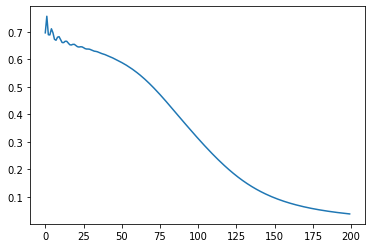

tensor(1.3239, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 62.50 %; correct: 5; wrong: 3;
Test accuracy no-doubt: 37.50 %; correct: 3; wrong: 5;

Epoch: 0/200; Loss: 0.7075; Accuracy: 47.16 %
Epoch: 50/200; Loss: 0.5885; Accuracy: 68.47 %
Epoch: 100/200; Loss: 0.2990; Accuracy: 92.33 %
Epoch: 150/200; Loss: 0.0860; Accuracy: 99.72 %


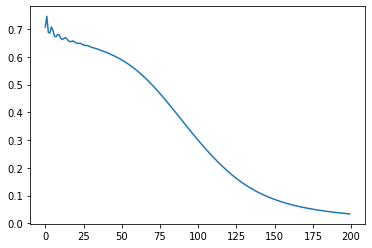

tensor(1.4941, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 40.00 %; correct: 4; wrong: 6;
Test accuracy no-doubt: 83.33 %; correct: 5; wrong: 1;

Epoch: 0/200; Loss: 0.6991; Accuracy: 47.44 %
Epoch: 50/200; Loss: 0.5851; Accuracy: 69.32 %
Epoch: 100/200; Loss: 0.3332; Accuracy: 90.06 %
Epoch: 150/200; Loss: 0.1048; Accuracy: 99.72 %


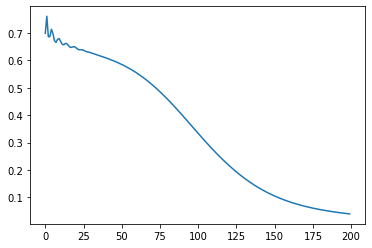

tensor(0.7602, grad_fn=<NllLossBackward>)
Test accuracy total: 75.00 %; correct: 12; wrong: 4;
Test accuracy doubt: 83.33 %; correct: 5; wrong: 1;
Test accuracy no-doubt: 70.00 %; correct: 7; wrong: 3;

Epoch: 0/200; Loss: 0.7440; Accuracy: 47.44 %
Epoch: 50/200; Loss: 0.5744; Accuracy: 71.88 %
Epoch: 100/200; Loss: 0.2808; Accuracy: 93.18 %
Epoch: 150/200; Loss: 0.0793; Accuracy: 100.00 %


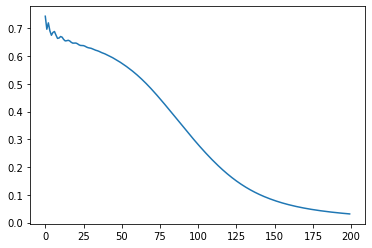

tensor(3.2543, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 0.00 %; correct: 0; wrong: 8;
Test accuracy no-doubt: 100.00 %; correct: 8; wrong: 0;

Epoch: 0/200; Loss: 0.6931; Accuracy: 51.99 %
Epoch: 50/200; Loss: 0.5604; Accuracy: 73.30 %
Epoch: 100/200; Loss: 0.2499; Accuracy: 93.75 %
Epoch: 150/200; Loss: 0.0619; Accuracy: 100.00 %


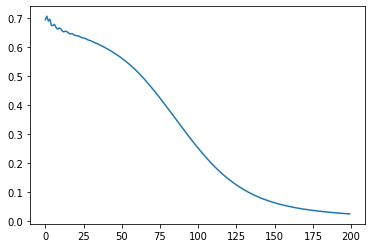

tensor(1.7765, grad_fn=<NllLossBackward>)
Test accuracy total: 37.50 %; correct: 6; wrong: 10;
Test accuracy doubt: 50.00 %; correct: 3; wrong: 3;
Test accuracy no-doubt: 30.00 %; correct: 3; wrong: 7;

Epoch: 0/200; Loss: 0.7084; Accuracy: 46.59 %
Epoch: 50/200; Loss: 0.5920; Accuracy: 70.74 %
Epoch: 100/200; Loss: 0.3498; Accuracy: 88.92 %
Epoch: 150/200; Loss: 0.1209; Accuracy: 99.15 %


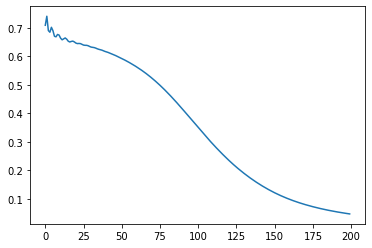

tensor(1.3013, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 40.00 %; correct: 4; wrong: 6;
Test accuracy no-doubt: 83.33 %; correct: 5; wrong: 1;

Epoch: 0/200; Loss: 0.7285; Accuracy: 47.44 %
Epoch: 50/200; Loss: 0.5682; Accuracy: 71.02 %
Epoch: 100/200; Loss: 0.2756; Accuracy: 92.33 %
Epoch: 150/200; Loss: 0.0809; Accuracy: 100.00 %


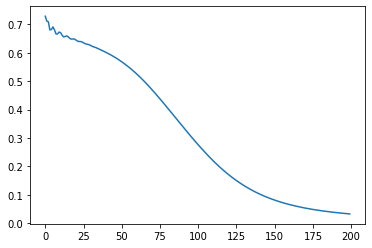

tensor(1.1565, grad_fn=<NllLossBackward>)
Test accuracy total: 43.75 %; correct: 7; wrong: 9;
Test accuracy doubt: 12.50 %; correct: 1; wrong: 7;
Test accuracy no-doubt: 75.00 %; correct: 6; wrong: 2;

Epoch: 0/200; Loss: 0.7535; Accuracy: 47.44 %
Epoch: 50/200; Loss: 0.5780; Accuracy: 72.16 %
Epoch: 100/200; Loss: 0.3271; Accuracy: 87.50 %
Epoch: 150/200; Loss: 0.1036; Accuracy: 99.43 %


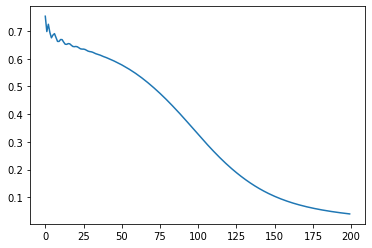

tensor(1.1191, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 50.00 %; correct: 4; wrong: 4;
Test accuracy no-doubt: 62.50 %; correct: 5; wrong: 3;

Epoch: 0/200; Loss: 0.7278; Accuracy: 52.56 %
Epoch: 50/200; Loss: 0.5811; Accuracy: 69.60 %
Epoch: 100/200; Loss: 0.3034; Accuracy: 90.62 %
Epoch: 150/200; Loss: 0.0899; Accuracy: 99.72 %


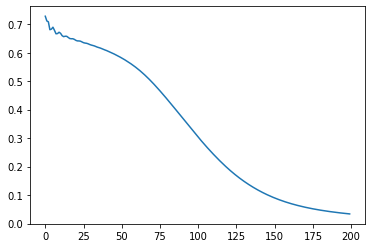

tensor(1.7503, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 75.00 %; correct: 6; wrong: 2;
Test accuracy no-doubt: 37.50 %; correct: 3; wrong: 5;

Epoch: 0/200; Loss: 0.7124; Accuracy: 49.72 %
Epoch: 50/200; Loss: 0.5887; Accuracy: 68.47 %
Epoch: 100/200; Loss: 0.2918; Accuracy: 92.61 %
Epoch: 150/200; Loss: 0.0864; Accuracy: 99.72 %


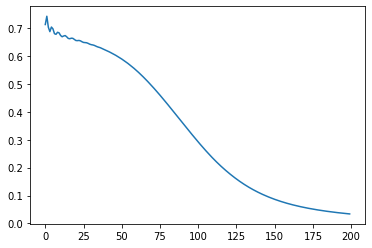

tensor(1.4413, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 75.00 %; correct: 0; wrong: 0;
Test accuracy no-doubt: 50.00 %; correct: 8; wrong: 8;

Epoch: 0/200; Loss: 0.6941; Accuracy: 54.83 %
Epoch: 50/200; Loss: 0.5598; Accuracy: 74.15 %
Epoch: 100/200; Loss: 0.2735; Accuracy: 91.48 %
Epoch: 150/200; Loss: 0.0816; Accuracy: 100.00 %


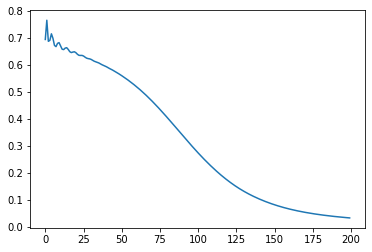

tensor(2.1926, grad_fn=<NllLossBackward>)
Test accuracy total: 25.00 %; correct: 4; wrong: 12;
Test accuracy doubt: 25.00 %; correct: 4; wrong: 12;
Test accuracy no-doubt: 50.00 %; correct: 0; wrong: 0;

Epoch: 0/200; Loss: 0.6843; Accuracy: 58.81 %
Epoch: 50/200; Loss: 0.5903; Accuracy: 67.90 %
Epoch: 100/200; Loss: 0.3446; Accuracy: 87.22 %
Epoch: 150/200; Loss: 0.1219; Accuracy: 99.15 %


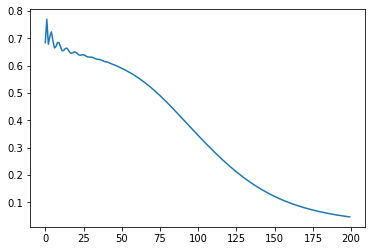

tensor(1.6199, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 30.00 %; correct: 3; wrong: 7;
Test accuracy no-doubt: 83.33 %; correct: 5; wrong: 1;

Epoch: 0/200; Loss: 0.7110; Accuracy: 47.73 %
Epoch: 50/200; Loss: 0.5671; Accuracy: 71.88 %
Epoch: 100/200; Loss: 0.2660; Accuracy: 93.18 %
Epoch: 150/200; Loss: 0.0718; Accuracy: 100.00 %


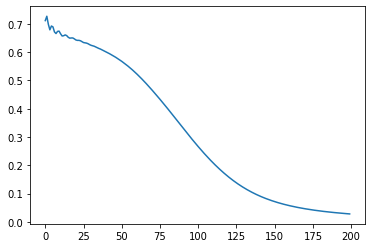

tensor(1.1016, grad_fn=<NllLossBackward>)
Test accuracy total: 62.50 %; correct: 10; wrong: 6;
Test accuracy doubt: 50.00 %; correct: 3; wrong: 3;
Test accuracy no-doubt: 70.00 %; correct: 7; wrong: 3;

Epoch: 0/200; Loss: 0.6914; Accuracy: 54.83 %
Epoch: 50/200; Loss: 0.5888; Accuracy: 66.76 %
Epoch: 100/200; Loss: 0.3379; Accuracy: 88.07 %
Epoch: 150/200; Loss: 0.1092; Accuracy: 100.00 %


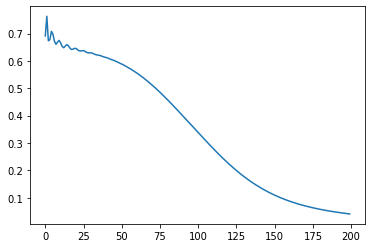

tensor(3.0966, grad_fn=<NllLossBackward>)
Test accuracy total: 12.50 %; correct: 2; wrong: 14;
Test accuracy doubt: 12.50 %; correct: 2; wrong: 14;
Test accuracy no-doubt: 70.00 %; correct: 0; wrong: 0;

Epoch: 0/200; Loss: 0.7409; Accuracy: 52.27 %
Epoch: 50/200; Loss: 0.6004; Accuracy: 67.90 %
Epoch: 100/200; Loss: 0.3440; Accuracy: 88.92 %
Epoch: 150/200; Loss: 0.0972; Accuracy: 99.72 %


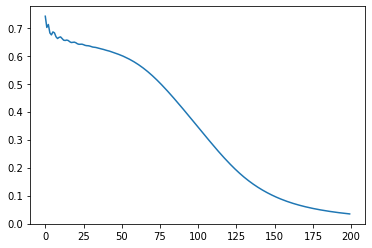

tensor(2.9689, grad_fn=<NllLossBackward>)
Test accuracy total: 37.50 %; correct: 6; wrong: 10;
Test accuracy doubt: 71.43 %; correct: 5; wrong: 2;
Test accuracy no-doubt: 11.11 %; correct: 1; wrong: 8;

Epoch: 0/200; Loss: 0.7033; Accuracy: 52.56 %
Epoch: 50/200; Loss: 0.5775; Accuracy: 71.88 %
Epoch: 100/200; Loss: 0.3250; Accuracy: 90.91 %
Epoch: 150/200; Loss: 0.1021; Accuracy: 100.00 %


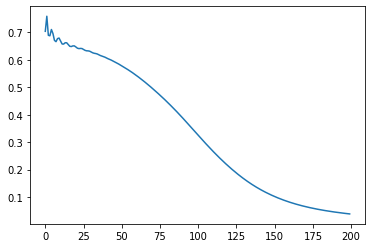

tensor(1.6589, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 25.00 %; correct: 2; wrong: 6;
Test accuracy no-doubt: 87.50 %; correct: 7; wrong: 1;

Epoch: 0/200; Loss: 0.7080; Accuracy: 50.28 %
Epoch: 50/200; Loss: 0.5665; Accuracy: 73.58 %
Epoch: 100/200; Loss: 0.2571; Accuracy: 94.03 %
Epoch: 150/200; Loss: 0.0754; Accuracy: 100.00 %


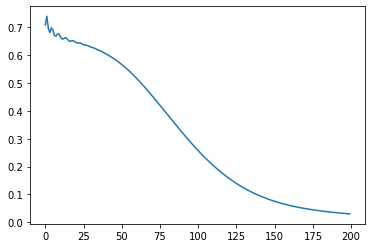

tensor(2.2633, grad_fn=<NllLossBackward>)
Test accuracy total: 31.25 %; correct: 5; wrong: 11;
Test accuracy doubt: 25.00 %; correct: 0; wrong: 0;
Test accuracy no-doubt: 31.25 %; correct: 5; wrong: 11;

Epoch: 0/200; Loss: 0.7263; Accuracy: 47.44 %
Epoch: 50/200; Loss: 0.5897; Accuracy: 69.89 %
Epoch: 100/200; Loss: 0.3253; Accuracy: 90.62 %
Epoch: 150/200; Loss: 0.0992; Accuracy: 99.72 %


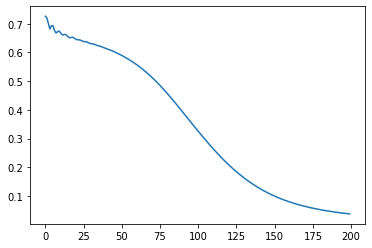

tensor(1.8320, grad_fn=<NllLossBackward>)
Test accuracy total: 43.75 %; correct: 7; wrong: 9;
Test accuracy doubt: 37.50 %; correct: 3; wrong: 5;
Test accuracy no-doubt: 50.00 %; correct: 4; wrong: 4;

Epoch: 0/200; Loss: 0.7102; Accuracy: 46.59 %
Epoch: 50/200; Loss: 0.5868; Accuracy: 70.17 %
Epoch: 100/200; Loss: 0.3201; Accuracy: 90.06 %
Epoch: 150/200; Loss: 0.0961; Accuracy: 100.00 %


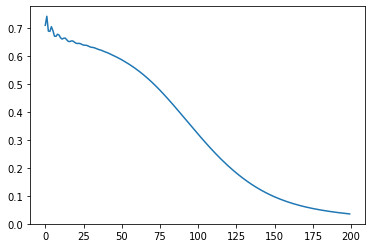

tensor(1.0634, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 25.00 %; correct: 2; wrong: 6;
Test accuracy no-doubt: 87.50 %; correct: 7; wrong: 1;

Epoch: 0/200; Loss: 0.6984; Accuracy: 49.43 %
Epoch: 50/200; Loss: 0.5932; Accuracy: 68.18 %
Epoch: 100/200; Loss: 0.3116; Accuracy: 91.76 %
Epoch: 150/200; Loss: 0.0932; Accuracy: 100.00 %


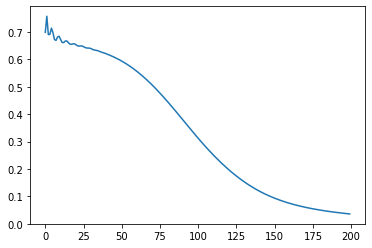

tensor(1.7163, grad_fn=<NllLossBackward>)
Test accuracy total: 31.25 %; correct: 5; wrong: 11;
Test accuracy doubt: 25.00 %; correct: 0; wrong: 0;
Test accuracy no-doubt: 31.25 %; correct: 5; wrong: 11;

Epoch: 0/200; Loss: 0.8313; Accuracy: 48.01 %
Epoch: 50/200; Loss: 0.5968; Accuracy: 67.33 %
Epoch: 100/200; Loss: 0.3744; Accuracy: 87.78 %
Epoch: 150/200; Loss: 0.1465; Accuracy: 99.15 %


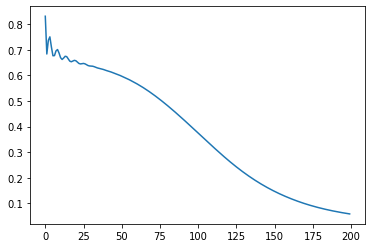

tensor(0.6472, grad_fn=<NllLossBackward>)
Test accuracy total: 68.75 %; correct: 11; wrong: 5;
Test accuracy doubt: 66.67 %; correct: 4; wrong: 2;
Test accuracy no-doubt: 70.00 %; correct: 7; wrong: 3;

Epoch: 0/200; Loss: 0.7549; Accuracy: 46.88 %
Epoch: 50/200; Loss: 0.5950; Accuracy: 69.60 %
Epoch: 100/200; Loss: 0.3486; Accuracy: 89.20 %
Epoch: 150/200; Loss: 0.1225; Accuracy: 99.15 %


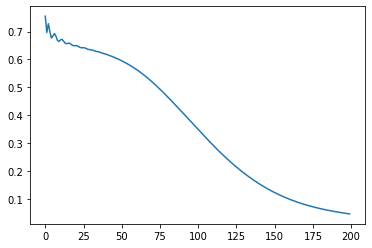

tensor(1.2724, grad_fn=<NllLossBackward>)
Test accuracy total: 68.75 %; correct: 11; wrong: 5;
Test accuracy doubt: 70.00 %; correct: 7; wrong: 3;
Test accuracy no-doubt: 66.67 %; correct: 4; wrong: 2;

Epoch: 0/200; Loss: 0.7001; Accuracy: 47.44 %
Epoch: 50/200; Loss: 0.5897; Accuracy: 70.17 %
Epoch: 100/200; Loss: 0.3136; Accuracy: 90.62 %
Epoch: 150/200; Loss: 0.0938; Accuracy: 100.00 %


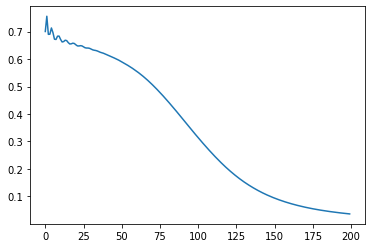

tensor(1.3686, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 50.00 %; correct: 4; wrong: 4;
Test accuracy no-doubt: 62.50 %; correct: 5; wrong: 3;



In [8]:
all_losses = [[] for _ in range(num_participants)]
test_accuracies = []
test_accuracies_doubt = []
test_accuracies_nodoubt = []
for par in range(num_participants-1, -1, -1):
    # K-fold like method to select one participant as the test set
    msk = [True for _ in range(16*num_participants)]
    for i in range(16*par, 16*(par+1)):
        msk[i] = False
    msk = np.array(msk)
    data_train = data[msk]
    data_test = data[~msk]

    train_inputs = data_train.iloc[:, :num_feats]
    # # pertubation .5
    # train_inputs.iloc[0, :] = 0.5
    # # pertubation avg
    # train_inputs.iloc[0, :] = train_inputs.iloc[1:, :].sum(axis=0)/(train_inputs.shape[0]-1)
    # # pertubation deltas acuumulation
    # train_inputs = train_inputs.cumsum(axis=0)

    train_labels = data_train.iloc[:, num_feats]

    test_inputs = data_test.iloc[:, :num_feats]
    test_labels = data_test.iloc[:, num_feats]

    X_train = torch.tensor(train_inputs.values, dtype=torch.float)
    Y_train = torch.tensor(train_labels.values, dtype=torch.long)

    # net = nn.Sequential(nn.Linear(num_feats, num_hidden_neurons), nn.Sigmoid(), nn.Dropout(.5), nn.Linear(num_hidden_neurons, num_classes))
    # net = TwoLayerNet(num_inputs, num_hidden_neurons, num_classes, is_training=True)
    net = nn.Sequential(nn.Linear(num_feats, num_hidden_neurons), nn.Sigmoid(), nn.Linear(num_hidden_neurons, num_classes))
    # use crossentropy loss and adam for optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        Y_train_pred = net(X_train)
        loss = loss_func(Y_train_pred, Y_train)
        all_losses[par].append(loss.item())
        if epoch % 50 == 0:
            _, predicted = torch.max(Y_train_pred, 1)
            total = Y_train.data.size(0)
            correct = sum(predicted.data.numpy() == Y_train.data.numpy())
            print('Epoch: %d/%d; Loss: %.4f; Accuracy: %.2f %%' %(epoch, epochs, loss, 100*correct/total))
        net.zero_grad()
        loss.backward()
        optimizer.step()
    
    # extra visulization for training outcomes
    plt.figure()
    plt.plot(all_losses[par])
    plt.show()

    # test our network
    X_test = torch.tensor(test_inputs.values, dtype=torch.float)
    Y_test = torch.tensor(test_labels.values, dtype=torch.long)
    Y_test_pred = net(X_test)
    loss = loss_func(Y_test_pred, Y_test)
    print(loss)
    _, predicted = torch.max(Y_test_pred, 1)
    total_test = Y_test.shape[0]
    correct_test = sum(predicted.data.numpy() == Y_test.data.numpy())
    # calculate doubt and trust separately
    correct_doubt, correct_nodoubt, total_doubt, total_nodoubt = 0, 0, 0, 0
    for i in range(total_test):
        if Y_test.data.numpy()[i] == 1:
            total_nodoubt += 1
            if predicted.data.numpy()[i] == 1:
                correct_nodoubt += 1
        else:
            total_doubt += 1
            if predicted.data.numpy()[i] == 0:
                correct_doubt += 1
    test_accuracies.append(correct_test/total_test)
    if total_doubt != 0:
        test_accuracies_doubt.append(correct_doubt/total_doubt)
    if total_nodoubt != 0:
        test_accuracies_nodoubt.append(correct_nodoubt/total_nodoubt)
    print('Test accuracy total: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies[-1], correct_test, total_test-correct_test))
    print('Test accuracy doubt: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies_doubt[-1], correct_doubt, total_doubt-correct_doubt))
    print('Test accuracy no-doubt: %.2f %%; correct: %d; wrong: %d;\n' %(100*test_accuracies_nodoubt[-1], correct_nodoubt, total_nodoubt-correct_nodoubt))

In [9]:
# print(*[(name, param.shape) for name, param in net.named_parameters()])
weight_input2hidden = np.absolute(net.state_dict()['0.weight'].data.numpy())
weight_hidden2output = np.absolute(net.state_dict()['2.weight'].data.numpy())
weight_input2hidden /= weight_input2hidden.sum(axis=1, keepdims=True)
weight_hidden2output /= weight_hidden2output.sum(axis=1, keepdims=True)
# calculate the Q weight matrix
Q = np.dot(weight_hidden2output, weight_input2hidden).sum(axis=0)
np.argsort(Q)

array([28, 31, 36, 18, 15, 23, 10,  2,  5, 30, 17, 21,  4, 13, 27, 26, 12,
       34, 16, 29,  7,  8,  1,  6, 38, 25,  0,  3, 32, 14, 20, 33, 19, 37,
       22, 35,  9, 24, 11])

In [11]:
# show accuracies
print('Total accuracy: %.3f' %(sum(test_accuracies)/len(test_accuracies)))
print('Doubt accuracy: %.3f' %(sum(test_accuracies_doubt)/len(test_accuracies_doubt)))
print('Trust accuracy: %.3f' %(sum(test_accuracies_nodoubt)/len(test_accuracies_nodoubt)))

Total accuracy: 0.492
Doubt accuracy: 0.438
Trust accuracy: 0.610


Text(0, 0.5, 'Input Order')

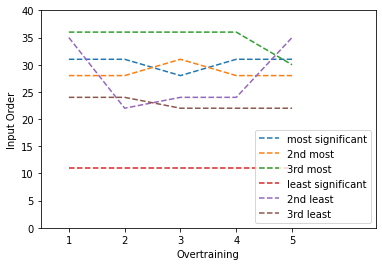

In [12]:
# plot the overtrained significant input orders
import matplotlib.pyplot as plt
x = np.arange(1, 6, 1)
ymax = np.array([[31, 28, 36, 23, 18, 10, 15, 17], [31, 28, 36,  7, 15, 18,  6,  4], [28, 31, 36, 10, 30, 23,  6, 15], [31, 28, 36, 30, 23, 18, 15, 10], [31, 28, 30,  7, 17, 29, 18, 36]])
y = np.array([[31, 28, 36, 11, 35, 24 ], [31, 28, 36, 11, 22, 24], [28, 31, 36, 11, 24, 22], [31, 28, 36, 11, 24, 22], [31, 28, 30, 11, 35, 22]])
ymin = np.array([[14, 25, 22, 37, 19, 24, 35, 11], [0, 14,  9, 37, 35, 24, 22, 11], [25, 14, 37, 9, 35, 22, 24, 11], [19, 14, 35, 9, 37, 22, 24, 11], [14, 37, 25, 24,  9, 22, 35, 11] ])
plt.plot(x, y, '--', label=['most significant', '2nd most', '3rd most', 'least significant', '2nd least', '3rd least'])
plt.axis([0.5, 6.5, 0, 40])
plt.xticks(x)
plt.legend(loc='best')
plt.xlabel('Overtraining')
plt.ylabel('Input Order')

In [13]:
# save selected pupil data
# data.to_csv('pupillary_dilation.csv', index=False)

In [14]:
# avg
train_inputs.iloc[0, :] = train_inputs.iloc[1:, :].sum(axis=0)/(train_inputs.shape[0]-1)